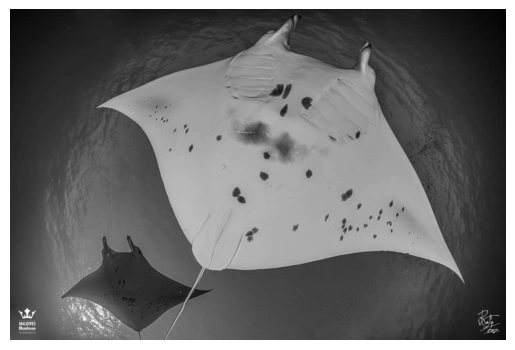

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

sns.set_theme(style='darkgrid')

frame = cv2.imread('manta_example_4.jpg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

gray = frame.copy()

gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

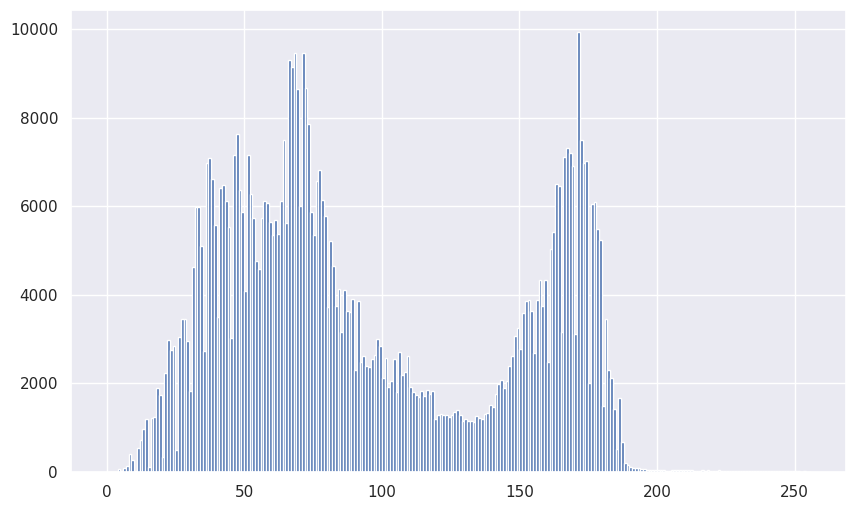

In [27]:
# histogram of colors
plt.figure(figsize=(10, 6))
plt.hist(gray.ravel(), 256, [0, 256])
plt.show()

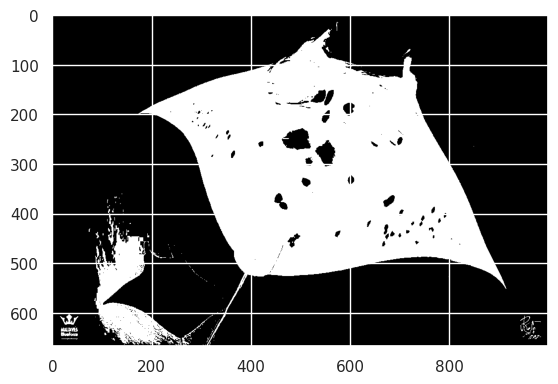

In [29]:
# binarize the image at a threshold of 120
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')

Found 165 contours


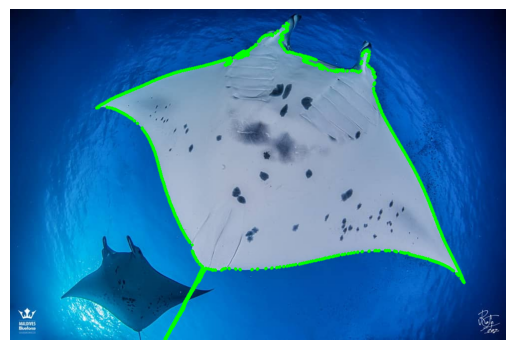

In [31]:
draw = frame.copy()

# find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f'Found {len(contours)} contours')

# largest contour
largest = max(contours, key=cv2.contourArea)

cv2.drawContours(draw, largest, -1, (0, 255, 0), 5)
    
plt.imshow(draw)
plt.grid(False)
plt.axis('off')
plt.show()

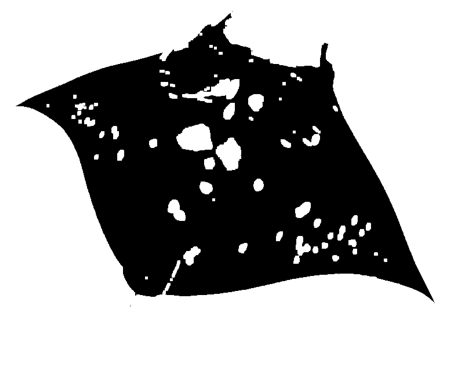

In [78]:
mask = np.zeros_like(binary)
cv2.fillPoly(mask, [largest], 255)

masked = cv2.bitwise_and(binary, binary, mask=mask)

# crop to the bounding box
x, y, w, h = cv2.boundingRect(largest)

masked = masked[y:y+h, x:x+w]

# erode the mask
kernel = np.ones((3, 3), np.uint8)
masked = cv2.erode(masked, kernel, iterations=2)

# invert the mask
masked = cv2.bitwise_not(masked)

plt.imshow(masked, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

Found 68 islands


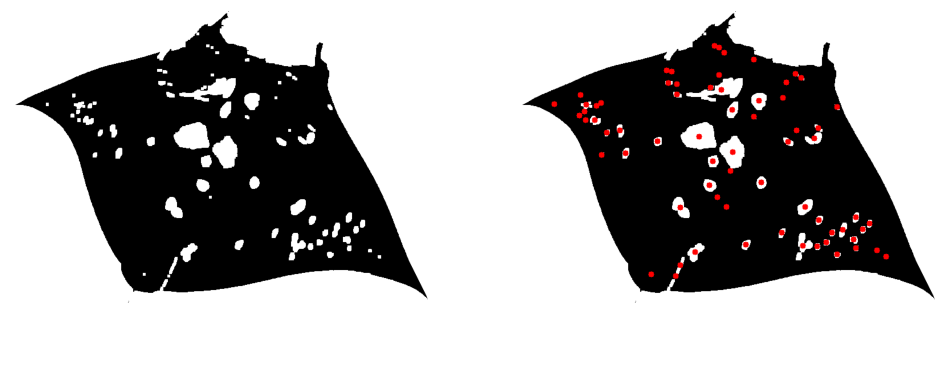

In [81]:
# islands
output = cv2.connectedComponentsWithStats(masked, connectivity=8)

centroids = output[3]

print(f'Found {len(centroids)} islands')

draw = masked.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_GRAY2RGB)

for centroid in centroids:
    x, y = centroid.astype(int)
    cv2.circle(draw, (x, y), 5, (255, 0, 0), -1)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(masked, cmap='gray')
plt.grid(False)
plt.axis('off')

plt.subplot(122)
plt.imshow(draw)
plt.grid(False)
plt.axis('off')
plt.show()

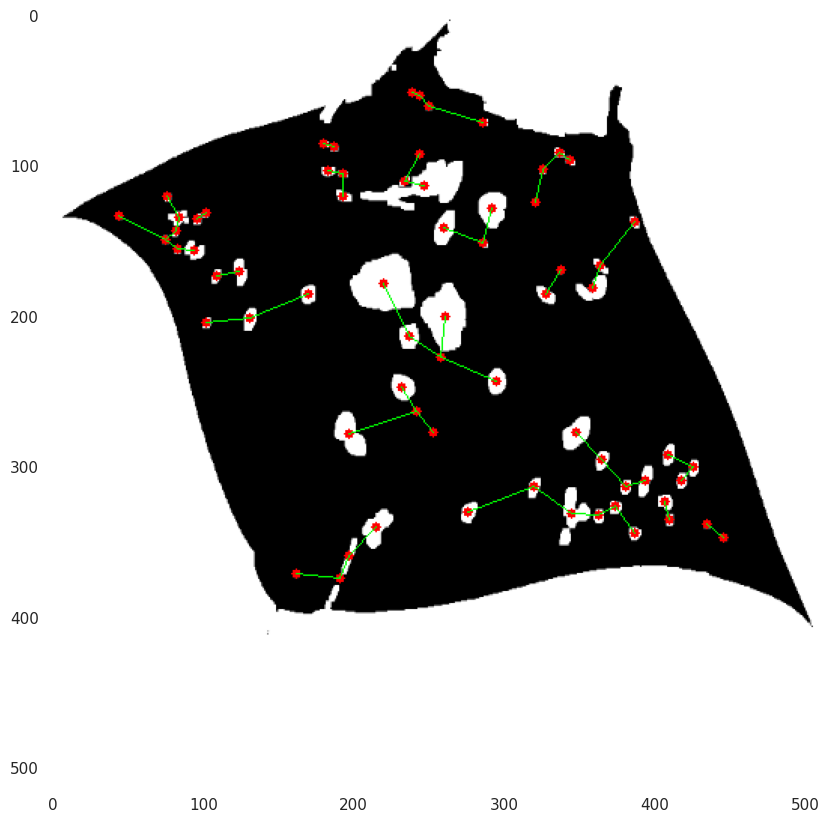

In [87]:
# resize centroids and mask to be between 0 and 512
new_w, new_h = 512, 512
centroids = centroids * [new_w / masked.shape[1], new_h / masked.shape[0]]

masked = cv2.resize(masked, (new_w, new_h))

draw = masked.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_GRAY2RGB)

for centroid in centroids:
    x, y = centroid.astype(int)
    cv2.circle(draw, (x, y), 3, (255, 0, 0), -1)
    
# for each centroid, draw a line to its nearest neighbor
for i, centroid in enumerate(centroids):
    
    distances = np.linalg.norm(centroids - centroid, axis=1)
    distances[i] = np.inf
    nearest = np.argmin(distances)
    
    x, y = centroid.astype(int)
    x2, y2 = centroids[nearest].astype(int)
    cv2.line(draw, (x, y), (x2, y2), (0, 255, 0), 1)

plt.figure(figsize=(10, 10))
plt.imshow(draw)
plt.grid(False)
plt.show()

In [88]:
%pip install pafy

  Obtaining dependency information for pafy from https://files.pythonhosted.org/packages/74/69/829919eeadff695338f98fa12bb99e45490761a2010c8d688d88b6df194a/pafy-0.5.5-py2.py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
https://mantarayadvocates.com/manta-ray-library/